# PREPROCESSING

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src import utils

data = '../data/raw'
data_preproc = '../data/processed'
target_col = 'SalePrice'

In [2]:
train = pd.read_csv(os.path.join(data, 'train.csv'), index_col='Id')
test = pd.read_csv(os.path.join(data, 'test.csv'), index_col='Id')

In [3]:
train_target = train[target_col]
train_data = train.drop(columns=target_col)

In [4]:
merged = pd.concat([train_data, test], axis=0, sort=True)
print(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      25
float64    11
dtype: int64
Dimensions of data: (2919, 79)


## Categorical features visualization

In [5]:
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))
print('\n')
display(num_merged.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
2,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
3,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'], dtype=object)

In [6]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_merged, num_merged.columns, 19, 2)

In [7]:
cat_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']
merged.loc[:, cat_col] = merged.loc[:, cat_col].astype('object')
merged.dtypes.value_counts()

object     48
int64      20
float64    11
dtype: int64

## Imputing missing values

In [8]:
missing_columns = merged.columns[merged.isnull().any()].values
missing_columns = len(merged) - merged.loc[:, np.sum(merged.isnull())>0].count()
missing_columns

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [9]:
nan_has_sense = ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish',
             'GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']

to_impute_by_none = merged.loc[:, nan_has_sense]
for i in to_impute_by_none.columns:
    merged[i].fillna('None', inplace = True)

In [10]:
cat_col = ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']

# input by mode
to_impute_by_mode =  merged.loc[:, cat_col]
for i in to_impute_by_mode.columns:
    merged[i].fillna(merged[i].mode()[0], inplace = True)

In [11]:
num_col = ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

# input by median
to_impute_by_median = merged.loc[:, num_col]
for i in to_impute_by_median.columns:
    merged[i].fillna(merged[i].median(), inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder

# ohe
le = LabelEncoder()

df = merged.reset_index().drop(columns=['Id','LotFrontage'], axis=1)
df = df.apply(le.fit_transform) # data is converted.

df['LotFrontage'] = merged['LotFrontage']
df = df.set_index('LotFrontage').reset_index()

In [13]:
'''correlation of df'''
corr = df.corr()
display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
1stFlrSF       0.130401
LotArea        0.115656
GarageArea     0.114088
GarageCars     0.113656
Name: LotFrontage, dtype: float64

BsmtQual      -0.078099
GarageType    -0.079098
KitchenQual   -0.083599
MSSubClass    -0.091973
BldgType      -0.097402
Name: LotFrontage, dtype: float64

In [14]:
'''Impute LotFrontage with median of respective columns (i.e., BldgType)'''
merged['LotFrontage'] = merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [15]:
print('Missing variables left untreated: ', merged.columns[merged.isna().any()].values)

Missing variables left untreated:  []


## Normalization

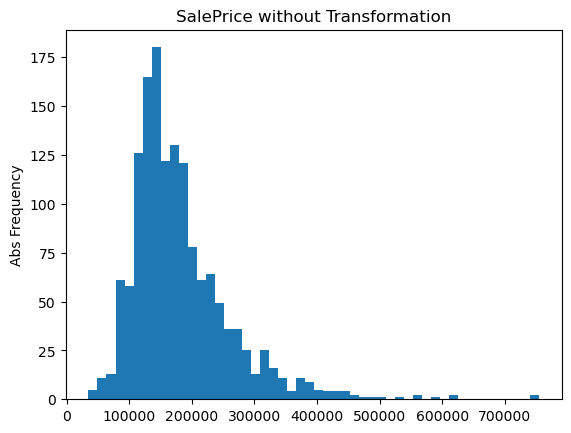

In [16]:
fig, ax = plt.subplots()
plt.hist(train_target, bins=50)
ax.set_title('SalePrice without Transformation')
ax.set_ylabel('Abs Frequency')
plt.show()

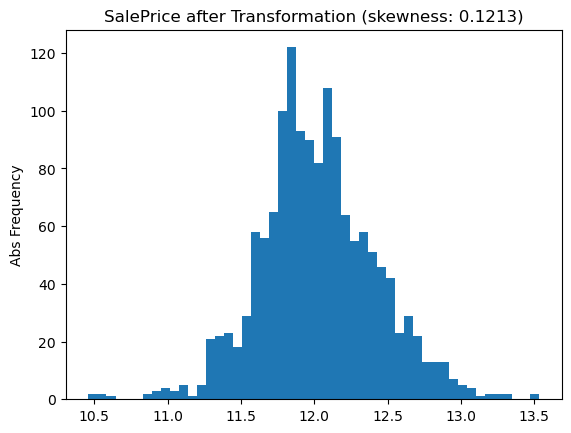

In [17]:
train_target = np.log1p(train_target)
fig, ax = plt.subplots()
plt.hist(train_target, bins=50)
ax.set_title('SalePrice after Transformation (skewness: {:0.4f})'.format(train_target.skew()))
ax.set_ylabel('Abs Frequency')
plt.show()

In [18]:
skew_num = pd.DataFrame(data = merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted.T

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,...,Fireplaces,HalfBath,BsmtFullBath,BedroomAbvGr,GarageArea,FullBath,GarageCars,GarageYrBlt,YearRemodAdd,YearBuilt
Skewness,21.95848,16.907017,12.829025,12.094977,11.381914,4.304467,4.148275,4.00595,3.948723,3.933616,...,0.733872,0.694924,0.625153,0.326492,0.241308,0.167692,-0.218705,-0.398781,-0.451252,-0.600114


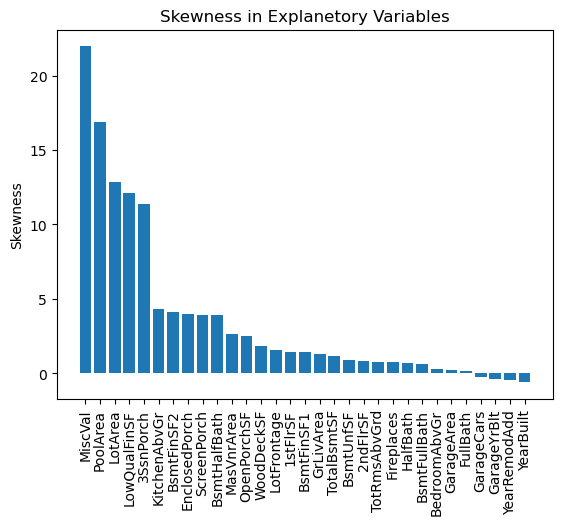

In [19]:
''' plot the skewness for rest of the explanetory variables'''
fig, ax = plt.subplots()
plt.bar(skew_num_sorted.index, skew_num_sorted.Skewness)
plt.xticks(rotation = 90)
ax.set_title('Skewness in Explanetory Variables')
ax.set_ylabel('Skewness')
plt.show()

In [20]:
'''Extract numeric variables merged data.'''
merged_num = merged.select_dtypes(include = ['int64', 'float64'])

'''Make the tranformation of the explanetory variables'''
merged_skewed = np.log1p(merged_num[merged_num.skew()[merged_num.skew() > 0.5].index])


#Normal variables
merged_normal = merged_num[merged_num.skew()[merged_num.skew() < 0.5].index]
    
#Merging
merged_num_all = pd.concat([merged_skewed, merged_normal], axis = 1)

'''Update numerical variables with transformed variables.'''
merged_num.update(merged_num_all)

### Feature engineering 

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
merged_num_scaled = scaler.fit_transform(merged_num)
merged_num_scaled = pd.DataFrame(data = merged_num_scaled, columns = merged_num.columns, index = merged_num.index)

In [22]:
"""Let's extract categorical variables first and convert them into category."""
merged_cat = merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding of ordinal variable"""
merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [23]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
merged_cat.loc[:, ['OverallQual', 'OverallCond']] = merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')
merged_label_encoded = merged_cat.select_dtypes(include = ['int64'])

In [24]:
merged_one_hot = merged_cat.select_dtypes(include=['category'])
merged_one_hot = pd.get_dummies(merged_one_hot, drop_first=True)

In [25]:
merged_encoded = pd.concat([merged_one_hot, merged_label_encoded], axis=1)
merged_processed = pd.concat([merged_num_scaled, merged_encoded], axis=1)

In [26]:
train_final = merged_processed.iloc[:train.shape[0], :]
test_final = merged_processed.iloc[train.shape[0]:, :]

In [27]:
utils.save_as_pickle(train_final, os.path.join(data_preproc, 'train.pkl'))
utils.save_as_pickle(test_final, os.path.join(data_preproc, 'test.pkl'))
utils.save_as_pickle(train_target, os.path.join(data_preproc, 'train_target.pkl'))